In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('aaa.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dummies=pd.get_dummies(df.Gender)

In [7]:
dummies.head(1)

,Female,Male
0,0,1


In [11]:
m=pd.concat([df,dummies],axis='columns')
m.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [18]:
final=m.drop(['Gender','Male'],axis='columns')
final.head(1)

,User ID,Age,EstimatedSalary,Purchased,Female
0,15624510,19,19000,0,0


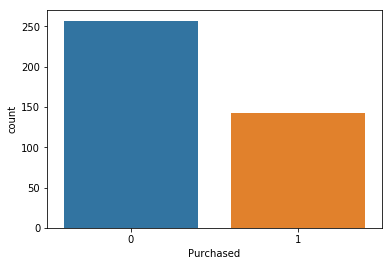

In [25]:
%matplotlib inline
sns.countplot(x="Purchased",data=df)

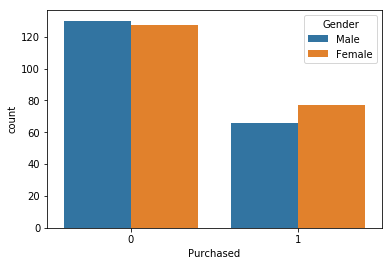

In [26]:
sns.countplot(x="Purchased",hue='Gender',data=df)

In [29]:
df.groupby('Purchased').count()['Gender']

Purchased
0    257
1    143
Name: Gender, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [34]:
x=final.drop('Purchased',axis='columns')
x.head(1)

,User ID,Age,EstimatedSalary,Female
0,15624510,19,19000,0


In [35]:
y=final.Purchased

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
z=KNeighborsClassifier(n_neighbors=10)

In [44]:
z.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [45]:
y_predict=z.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
z.score(x_test,y_test)

0.85

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[57,  1],
       [11, 11]], dtype=int64)

Text(33,0.5,'truth')

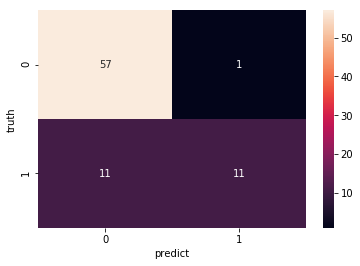

In [64]:
sns.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('truth')